Target:
* The previous model had achieved an RF of 20 and had ~87% accuracy. In this model,I tried to increase the RF to 22 and slightly reduce the parameter count.
* Instead of progressively increasing and then decreasing the channel count, in this model, I had kept the channel count constant at 10 and 16 in two convolution blocks.

Result:
* The parameter count has gone from ~9200 to ~9000
* At the end of the 15th epoch,the model got the highest test accuracy of approx. 98.2%. Maximum train accuracy was 98.4%

Analysis:
*  The train accuracy started off very low (< 20%) and increased to 90% in the 3rd epoch.
* Till the 10th epoch, the test accuracy was consistently higher than the train accuracy but after that the train accuracy increased disproportionately. This suggests that after 11th epoch, the model started to overfit.

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

Cloning into 'ERA_V1'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 177 (delta 76), reused 109 (delta 31), pack-reused 0
Receiving objects: 100% (177/177), 3.35 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (76/76), done.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_2_Net, model_summary, model_train, model_test

Allocate GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_2_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 10, 22, 22]             900
              ReLU-6           [-1, 10, 22, 22]               0
            Conv2d-7           [-1, 10, 20, 20]             900
              ReLU-8           [-1, 10, 20, 20]               0
         MaxPool2d-9           [-1, 10, 10, 10]               0
           Conv2d-10             [-1, 16, 8, 8]           1,440
             ReLU-11             [-1, 16, 8, 8]               0
           Conv2d-12             [-1, 16, 6, 6]           2,304
             ReLU-13             [-1, 16, 6, 6]               0
           Conv2d-14             [-1, 1

Define Transforms

In [4]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 89164115.45it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28302732.20it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27169835.34it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10010787.58it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

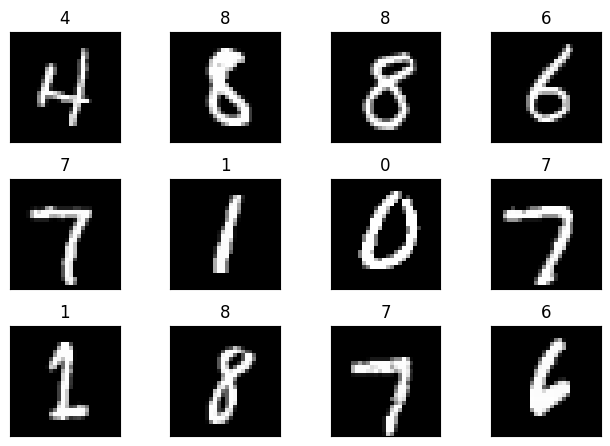

In [7]:
preview_batch_images(train_loader)

In [8]:
model = Model_2_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


loss=2.302569627761841 batch_id=468 Accuracy = 9.04: 100%|██████████| 469/469 [01:15<00:00,  6.19it/s]



Test set: Average loss: 2.3026, Accuracy: 901/10000 (9.01%)

epoch: 2


loss=2.3025588989257812 batch_id=468 Accuracy = 11.44: 100%|██████████| 469/469 [01:17<00:00,  6.06it/s]



Test set: Average loss: 2.3026, Accuracy: 1487/10000 (14.87%)

epoch: 3


loss=2.3025262355804443 batch_id=468 Accuracy = 14.95: 100%|██████████| 469/469 [01:16<00:00,  6.13it/s]



Test set: Average loss: 2.3025, Accuracy: 1378/10000 (13.78%)

epoch: 4


loss=2.302436351776123 batch_id=468 Accuracy = 12.93: 100%|██████████| 469/469 [01:15<00:00,  6.21it/s]



Test set: Average loss: 2.3020, Accuracy: 1100/10000 (11.00%)

epoch: 5


loss=0.31289127469062805 batch_id=468 Accuracy = 36.05: 100%|██████████| 469/469 [01:16<00:00,  6.10it/s]



Test set: Average loss: 0.3386, Accuracy: 8903/10000 (89.03%)

epoch: 6


loss=0.148887038230896 batch_id=468 Accuracy = 93.17: 100%|██████████| 469/469 [01:16<00:00,  6.14it/s]



Test set: Average loss: 0.1390, Accuracy: 9553/10000 (95.53%)

epoch: 7


loss=0.1251981109380722 batch_id=468 Accuracy = 96.20: 100%|██████████| 469/469 [01:15<00:00,  6.18it/s]



Test set: Average loss: 0.1020, Accuracy: 9698/10000 (96.98%)

epoch: 8


loss=0.06274475157260895 batch_id=468 Accuracy = 96.79: 100%|██████████| 469/469 [01:17<00:00,  6.01it/s]



Test set: Average loss: 0.0779, Accuracy: 9747/10000 (97.47%)

epoch: 9


loss=0.06388338655233383 batch_id=468 Accuracy = 97.30: 100%|██████████| 469/469 [01:16<00:00,  6.14it/s]



Test set: Average loss: 0.0656, Accuracy: 9791/10000 (97.91%)

epoch: 10


loss=0.029658475890755653 batch_id=468 Accuracy = 97.64: 100%|██████████| 469/469 [01:14<00:00,  6.26it/s]



Test set: Average loss: 0.0781, Accuracy: 9778/10000 (97.78%)

epoch: 11


loss=0.05501933395862579 batch_id=468 Accuracy = 97.89: 100%|██████████| 469/469 [01:16<00:00,  6.14it/s]



Test set: Average loss: 0.0603, Accuracy: 9797/10000 (97.97%)

epoch: 12


loss=0.021784396842122078 batch_id=468 Accuracy = 98.18: 100%|██████████| 469/469 [01:13<00:00,  6.37it/s]



Test set: Average loss: 0.0666, Accuracy: 9792/10000 (97.92%)

epoch: 13


loss=0.06046833097934723 batch_id=468 Accuracy = 98.25: 100%|██████████| 469/469 [01:13<00:00,  6.34it/s]



Test set: Average loss: 0.0573, Accuracy: 9821/10000 (98.21%)

epoch: 14


loss=0.0873461589217186 batch_id=468 Accuracy = 98.42: 100%|██████████| 469/469 [01:14<00:00,  6.26it/s]



Test set: Average loss: 0.0435, Accuracy: 9860/10000 (98.60%)

epoch: 15


loss=0.04469330981373787 batch_id=468 Accuracy = 98.54: 100%|██████████| 469/469 [01:15<00:00,  6.22it/s]



Test set: Average loss: 0.0594, Accuracy: 9821/10000 (98.21%)

epoch: 16


loss=0.040566567331552505 batch_id=468 Accuracy = 98.63: 100%|██████████| 469/469 [01:16<00:00,  6.12it/s]



Test set: Average loss: 0.0408, Accuracy: 9887/10000 (98.87%)

epoch: 17


loss=0.05608149245381355 batch_id=468 Accuracy = 98.74: 100%|██████████| 469/469 [01:16<00:00,  6.09it/s]



Test set: Average loss: 0.0399, Accuracy: 9869/10000 (98.69%)

epoch: 18


loss=0.0991239845752716 batch_id=468 Accuracy = 98.75: 100%|██████████| 469/469 [01:15<00:00,  6.19it/s]



Test set: Average loss: 0.0476, Accuracy: 9854/10000 (98.54%)

epoch: 19


loss=0.05159049853682518 batch_id=468 Accuracy = 98.84: 100%|██████████| 469/469 [01:15<00:00,  6.25it/s]



Test set: Average loss: 0.0344, Accuracy: 9883/10000 (98.83%)



Plot Statistics

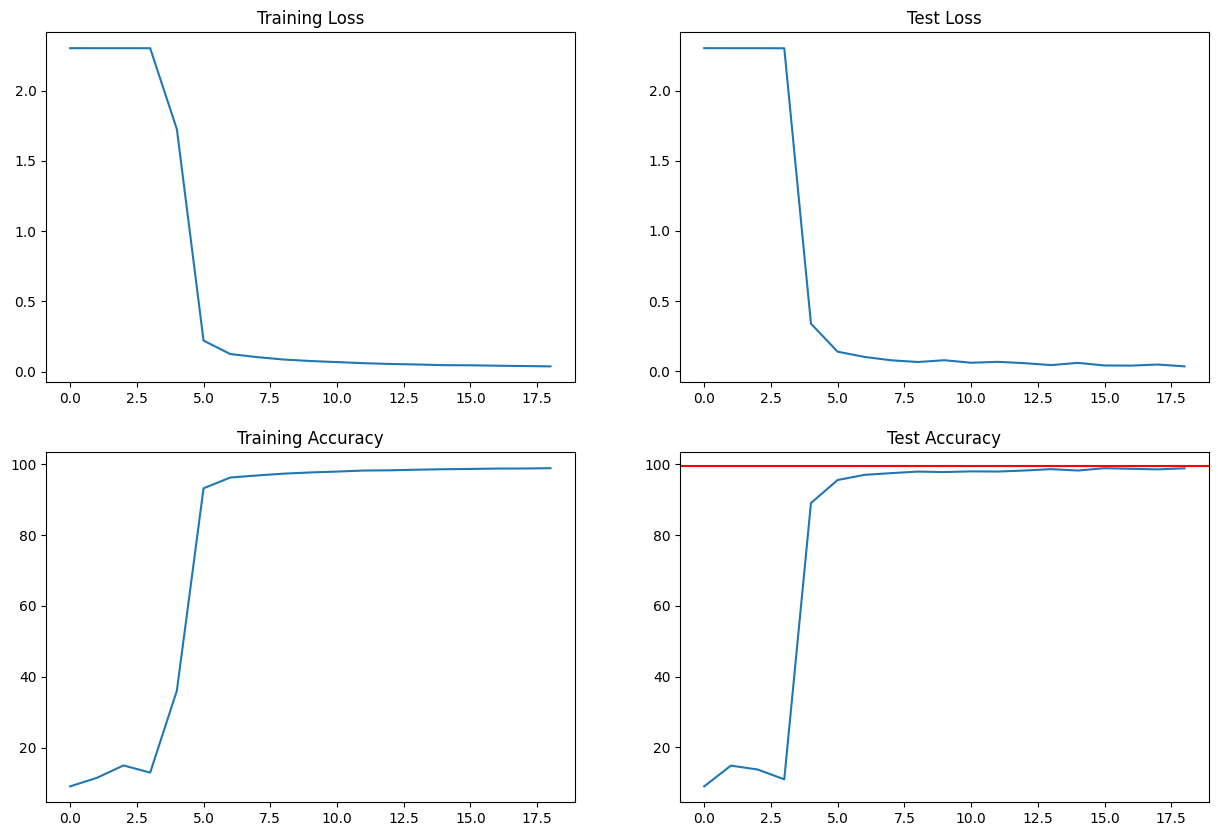

In [9]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)